In [4]:
import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
tpot_data = pd.read_csv('creditcard.csv', dtype=np.float64)
features = tpot_data.drop('Class', axis=1)
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['Class'], random_state=42)

# Average CV score on the training set was: 0.9995435492570677
exported_pipeline = ExtraTreesClassifier(bootstrap=False, criterion="entropy", max_features=0.8500000000000001, min_samples_leaf=5, min_samples_split=9, n_estimators=100)
# Fix random state in exported estimator
if hasattr(exported_pipeline, 'random_state'):
    setattr(exported_pipeline, 'random_state', 42)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)


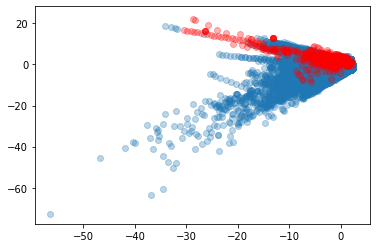

In [14]:
import matplotlib.pyplot as plt
good = tpot_data["Class"] == 0
bad = tpot_data["Class"] == 1
plt.scatter(tpot_data[good]["V1"], tpot_data[good]["V2"], alpha = .3)
plt.scatter(tpot_data[bad]["V1"], tpot_data[bad]["V2"], color = 'red', alpha = .3)

In [15]:
exported_pipeline.score

<bound method ClassifierMixin.score of ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='entropy', max_depth=None,
                     max_features=0.8500000000000001, max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.0,
                     min_impurity_split=None, min_samples_leaf=5,
                     min_samples_split=9, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=None, oob_score=False,
                     random_state=42, verbose=0, warm_start=False)>

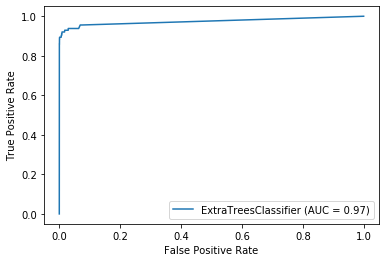

In [17]:
from sklearn.metrics import plot_roc_curve
ETC_disp = plot_roc_curve(exported_pipeline, testing_features, testing_target)
plt.show()

In [20]:
import sklearn
from sklearn.metrics import confusion_matrix
sklearn.metrics.confusion_matrix(testing_target, results, labels=None, sample_weight=None, normalize=None)

array([[71083,     6],
       [   26,    87]], dtype=int64)